In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv('test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [3]:
data.shape

(1459, 80)

In [13]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

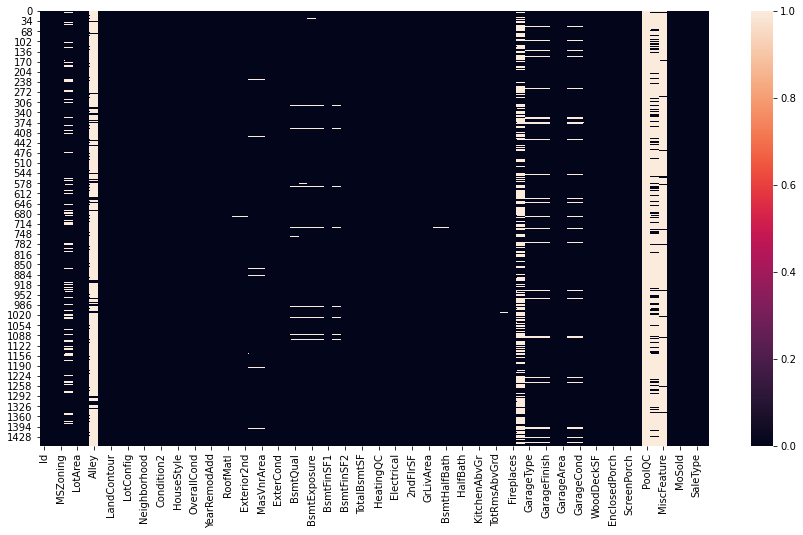

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isnull())

In [6]:
data['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
ConLI       4
Oth         4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [7]:
data['Utilities'].unique()

array(['AllPub', nan], dtype=object)

In [12]:
data.drop(['Alley'],axis=1,inplace=True)

In [8]:
data['MSZoning']=data['MSZoning'].fillna(data['MSZoning'].mode()[0])
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())

data['Utilities']=data['Utilities'].fillna(data['Utilities'].mode()[0])
data['Exterior1st']=data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd']=data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])
data['MasVnrType']=data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])
data['MasVnrArea']=data['MasVnrArea'].fillna(data['MasVnrArea'].mean())
data['BsmtQual']=data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])
data['BsmtCond']=data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])
data['BsmtExposure']=data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])
data['BsmtFinType1']=data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])
data['BsmtFinType2']=data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])
data['BsmtFinSF1']=data['BsmtFinSF1'].fillna(data['BsmtFinSF1'].mean())
data['BsmtFinSF2']=data['BsmtFinSF2'].fillna(data['BsmtFinSF2'].mean())
data['BsmtUnfSF']=data['BsmtUnfSF'].fillna(data['BsmtUnfSF'].mean())
data['TotalBsmtSF']=data['TotalBsmtSF'].fillna(data['TotalBsmtSF'].mean())
data['BsmtFullBath']=data['BsmtFullBath'].fillna(data['BsmtFullBath'].mode()[0])
data['BsmtHalfBath']=data['BsmtHalfBath'].fillna(data['BsmtHalfBath'].mode()[0])
data['KitchenQual']=data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])
data['Functional']=data['Functional'].fillna(data['Functional'].mode()[0])
data['FireplaceQu']=data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])
data['GarageType']=data['GarageType'].fillna(data['GarageType'].mode()[0])
data['GarageQual']=data['GarageQual'].fillna(data['GarageQual'].mode()[0])
data['GarageCond']=data['GarageCond'].fillna(data['GarageCond'].mode()[0])
data['GarageYrBlt']=data['GarageYrBlt'].fillna(data['GarageYrBlt'].median())
data['GarageFinish']=data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])
data['GarageCars']=data['GarageCars'].fillna(data['GarageCars'].mode()[0])
data['GarageArea']=data['GarageArea'].fillna(data['GarageArea'].mean())
data.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [9]:
data['SaleType']=data['SaleType'].fillna(data['SaleType'].mode()[0])

In [15]:
data.shape

(1459, 75)

In [14]:
data.drop(['Id'],axis=1,inplace=True)

In [16]:
data.to_csv('FEtest.csv',index=False)